In [1]:
import math
dim = 512
m = 3
w = 0.1

In [2]:
from speedup import generate_out_images, solve_inverse_implicit, solve_inverse_explicit, solve_inverse_implicit_split, recovery_quality
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os

# Исходное изображение

In [3]:
src1 = imageio.imread(os.getcwd() + '/source/src_1.png')
src2 = imageio.imread(os.getcwd() + '/source/src_2.png')
src3 = imageio.imread(os.getcwd() + '/source/src_3.png')

src = np.zeros((dim, dim, m), np.double)
src[:, :, 0] = src1[:, :, 0]
src[:, :, 1] = src2[:, :, 0]
src[:, :, 2] = src3[:, :, 0]
src = src / np.amax(src)

generated_images = generate_out_images(dim, m, w, src)
out = generated_images[0]

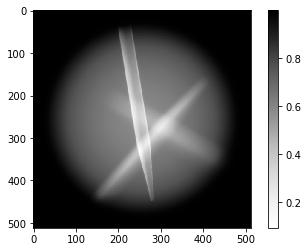

In [62]:
plt.imshow(np.ones((dim, dim)) - out[0:dim,0:dim,0], cmap="Greys", interpolation='nearest')
plt.colorbar()
plt.savefig('image.png')

# Неявный метод

In [5]:
result = solve_inverse_implicit(out, dim, m, w, 1, 20)

In [6]:
if(np.min(result) < 0):
    result = result + abs(np.min(result))
result = result / np.max(result)

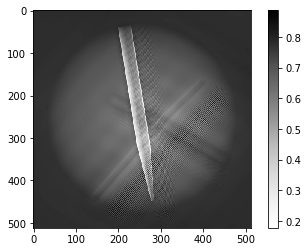

In [7]:
plt.imshow(np.ones((dim, dim)) - result[0:dim,0:dim,0], cmap="Greys", interpolation='nearest')
plt.colorbar()
plt.savefig('image.png')

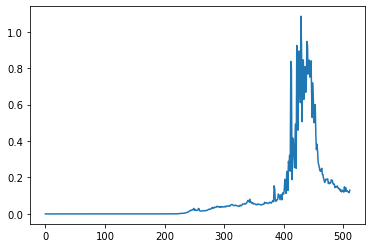

In [8]:
x_plot, y_plot = recovery_quality(src[:,:,0], result[:,:,0], dim)
plt.plot(x_plot, y_plot)
plt.savefig('graph.png')

# Явный метод

In [58]:
result = solve_inverse_explicit(out, dim, m, w, 0.01, 1)

In [59]:
if(np.min(result) < 0):
    result = result + abs(np.min(result))
result = result / np.max(result)

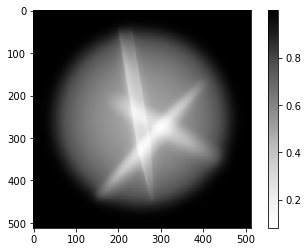

In [60]:
plt.imshow(np.ones((512, 512)) - result[0:512,0:512,0], cmap="Greys", interpolation='nearest')
plt.colorbar()
plt.savefig('image.png')

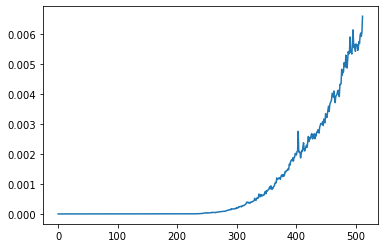

In [61]:
x_plot, y_plot = recovery_quality(src[:,:,1], result[:,:,1], dim)
plt.plot(x_plot, y_plot)
plt.savefig('graph.png')

# Разбиение по частотам

In [63]:
result_split = solve_inverse_implicit_split(out, dim, m, w, 10, 10, 1, 20, 360)

In [64]:
if(np.min(result_split) < 0):
    result_split = result_split + abs(np.min(result_split))
result_split = result_split / np.max(result_split)

In [65]:
x_plot_split, y_plot_split = recovery_quality(src[:,:,0], result_split[:,:,0], dim)

In [66]:
result1 = solve_inverse_implicit(out, dim, m, w, 10, 10)

In [67]:
if(np.min(result1) < 0):
    result1 = result1 + abs(np.min(result1))
result1 = result1 / np.max(result1)

In [68]:
x_plot1, y_plot1 = recovery_quality(src[:,:,0], result1[:,:,0], dim)

In [69]:
result2 = solve_inverse_implicit(out, dim, m, w, 1, 20)

In [70]:
if(np.min(result2) < 0):
    result2 = result2 + abs(np.min(result2))
result2 = result2 / np.max(result2)

In [71]:
x_plot2, y_plot2 = recovery_quality(src[:,:,0], result2[:,:,0], dim)

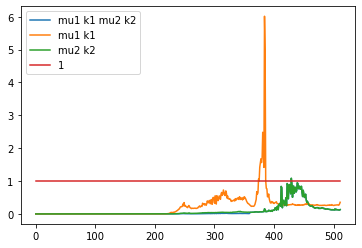

In [72]:
plt.plot(x_plot, y_plot_split, label = "mu1 k1 mu2 k2")
plt.plot(x_plot, y_plot1, label = "mu1 k1")
plt.plot(x_plot, y_plot2, label = "mu2 k2")
plt.plot(x_plot, np.ones((dim)), label = "1")
plt.legend()
plt.savefig('graph.png')